In [1]:
from functools import partial

import cupy as cp
import matplotlib.pyplot as plt

from superfv import EulerSolver, OutputLoader, plot_2d_slice
from superfv.initial_conditions import gresho_vortex
from superfv.slope_limiting.smooth_extrema_detection import (
    smooth_extrema_detector,
)

In [2]:
N = 96
gamma = 5 / 3
v0 = 5.0
M_max = 0.001

nsteps = 100

In [3]:
common = dict(PAD={"rho": (0, None), "P": (0, None)})
musclhancock = dict(p=1, MUSCL=True, **common)
apriori = dict(ZS=True, lazy_primitives="adaptive", **common)
aposteriori = dict(
    MOOD=True,
    face_fallback=False,
    lazy_primitives="full",
    MUSCL_limiter="PP2D",
    **common,
)
aposteriori1 = dict(cascade="muscl", max_MOOD_iters=1, **aposteriori)
aposteriori2 = dict(cascade="muscl1", max_MOOD_iters=2, **aposteriori)
aposteriori3 = dict(cascade="muscl1", max_MOOD_iters=3, **aposteriori)

no_v = dict(limiting_vars=("rho", "P"))

config0 = dict(p=3)
# config1 = dict(p=3, GL=True, **apriori, **no_v)
# config2 = dict(p=3, NAD_rtol=1e-2, **aposteriori1, **no_v)
# config1 = dict(p=7, GL=True, uniformity_tol=1e-5, **apriori)
# config2 = dict(p=7, NAD_rtol=1e-2, uniformity_tol=1e-5, **aposteriori1)
config1 = dict(p=3, GL=True, **apriori)
config2 = dict(p=3, GL=True, SED=False, **apriori)

In [4]:
sim0 = EulerSolver(
    ic=partial(gresho_vortex, gamma=gamma, M_max=M_max, v0=v0),
    gamma=gamma,
    nx=N,
    ny=N,
    cupy=True,
    **config0,
)
sim1 = EulerSolver(
    ic=partial(gresho_vortex, gamma=gamma, M_max=M_max, v0=v0),
    gamma=gamma,
    nx=N,
    ny=N,
    cupy=True,
    **config1,
)
sim2 = EulerSolver(
    ic=partial(gresho_vortex, gamma=gamma, M_max=M_max, v0=v0),
    gamma=gamma,
    nx=N,
    ny=N,
    cupy=True,
    **config2,
)

In [5]:
sim0.run(
    n=nsteps,
    q_max=2,
    muscl_hancock=config0.get("MUSCL", False),
    log_freq=1,
)
sim1.run(
    n=nsteps,
    q_max=2,
    muscl_hancock=config1.get("MUSCL", False),
    log_freq=1,
)
sim2.run(
    n=nsteps,
    q_max=2,
    muscl_hancock=config2.get("MUSCL", False),
    log_freq=1,
)

Step #100 @ t=4.15e-04 | dt=4.15e-06 | min(rho)=1.00e+00, min(P)=6.00e+05 | E_cons=0.00e+00 | (ran in 0.99s)
Step #100 @ t=4.15e-04 | dt=4.15e-06 | min(rho)=1.00e+00, min(P)=6.00e+05 | E_cons=9.54e-07 | (ran in 4.41s)
Step #100 @ t=4.15e-04 | dt=4.15e-06 | min(rho)=1.00e+00, min(P)=6.00e+05 | E_cons=0.00e+00 | (ran in 4.09s)


In [10]:
sim0 = OutputLoader(
    "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/p3/M_max_0.001"
)
sim1 = OutputLoader(
    "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/ZS3/M_max_0.001"
)
sim2 = OutputLoader(
    "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/ZS3/no_SED/M_max_0.001"
)

Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/p3/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/ZS3/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/short-debug/v0_5.0/ZS3/no_SED/M_max_0.001"


/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using nearest: 0.0400022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using nearest: 0.0400022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using nearest: 0.0400022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using nearest: 0.0400022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using nearest: 0.0400022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.04 not exactly matched in mesh; using near

(<matplotlib.image.AxesImage at 0x153104f5b770>,
 <matplotlib.colorbar.Colorbar at 0x15310578b860>)

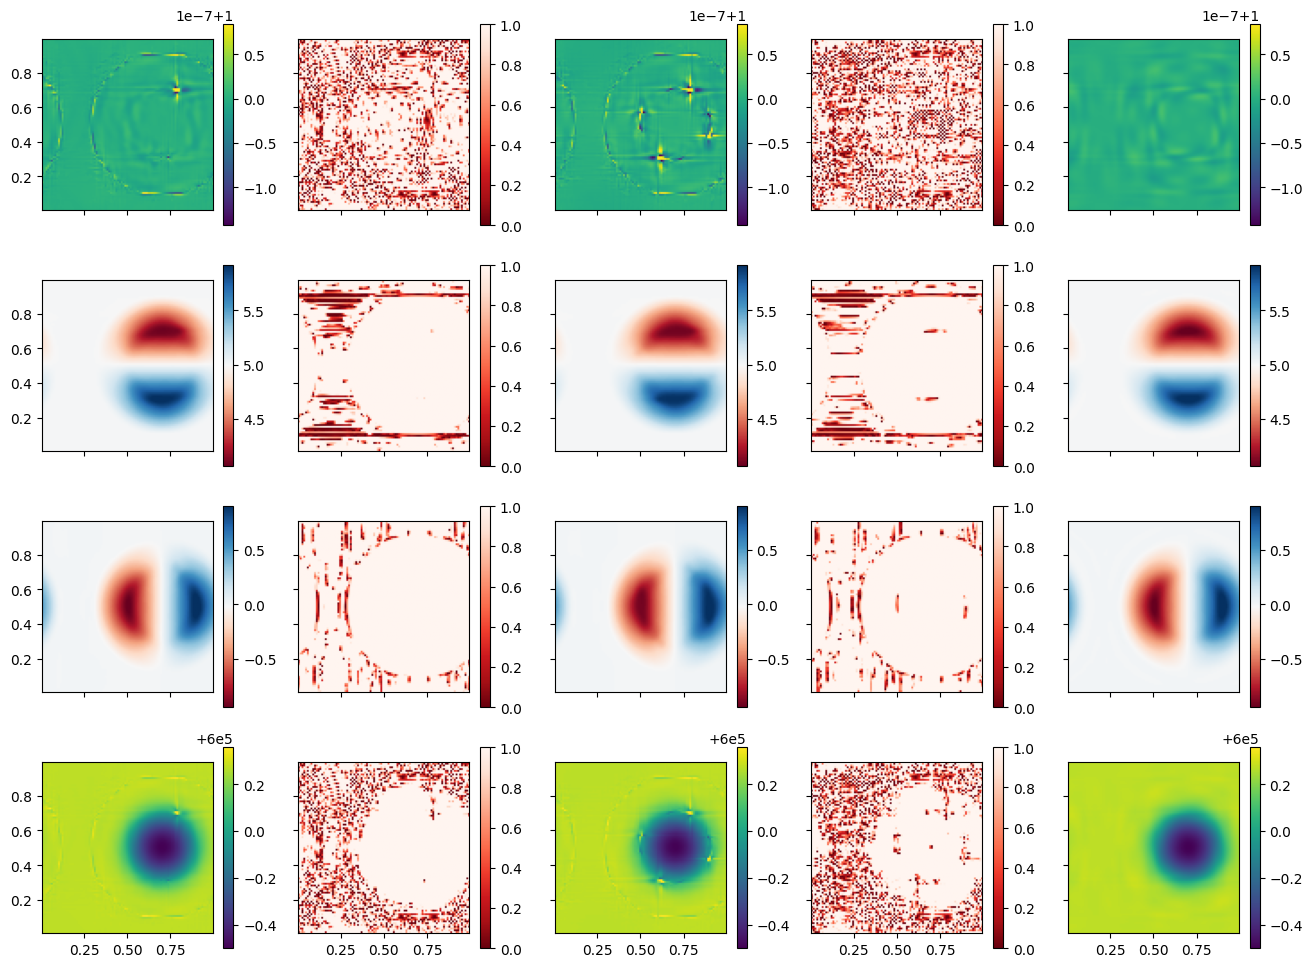

In [12]:
fig, axs = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(16, 12))

idx = sim1.variable_index_map
rho_min = min(sim.snapshots[-1]["w"][idx("rho")].min() for sim in [sim1, sim2])
rho_max = min(sim.snapshots[-1]["w"][idx("rho")].max() for sim in [sim1, sim2])
vx_min = min(sim.snapshots[-1]["w"][idx("vx")].min() for sim in [sim1, sim2])
vx_max = min(sim.snapshots[-1]["w"][idx("vx")].max() for sim in [sim1, sim2])
vy_min = min(sim.snapshots[-1]["w"][idx("vy")].min() for sim in [sim1, sim2])
vy_max = min(sim.snapshots[-1]["w"][idx("vy")].max() for sim in [sim1, sim2])
P_min = min(sim.snapshots[-1]["w"][idx("P")].min() for sim in [sim1, sim2])
P_max = min(sim.snapshots[-1]["w"][idx("P")].max() for sim in [sim1, sim2])

t = 0.02
P_rho_style = dict(t=t, cell_averaged=True, colorbar=True)
v_style = dict(t=t, cell_averaged=True, colorbar=True, cmap="RdBu")
theta_style = dict(
    t=t, theta=True, colorbar=True, cmap="Reds_r", vmin=0, vmax=1, visualization=False
)
trouble_style = dict(
    t=t, troubles=True, colorbar=True, cmap="Reds", vmin=0, vmax=1, visualization=False
)

plot_2d_slice(sim1, axs[0, 0], "rho", **P_rho_style, vmin=rho_min, vmax=rho_max)
plot_2d_slice(sim1, axs[1, 0], "vx", **v_style, vmin=vx_min, vmax=vx_max)
plot_2d_slice(sim1, axs[2, 0], "vy", **v_style, vmin=vy_min, vmax=vy_max)
plot_2d_slice(sim1, axs[3, 0], "P", **P_rho_style, vmin=P_min, vmax=P_max)

plot_2d_slice(sim1, axs[0, 1], "rho", **theta_style)
plot_2d_slice(sim1, axs[1, 1], "vx", **theta_style)
plot_2d_slice(sim1, axs[2, 1], "vy", **theta_style)
plot_2d_slice(sim1, axs[3, 1], "P", **theta_style)

plot_2d_slice(sim2, axs[0, 2], "rho", **P_rho_style, vmin=rho_min, vmax=rho_max)
plot_2d_slice(sim2, axs[1, 2], "vx", **v_style, vmin=vx_min, vmax=vx_max)
plot_2d_slice(sim2, axs[2, 2], "vy", **v_style, vmin=vy_min, vmax=vy_max)
plot_2d_slice(sim2, axs[3, 2], "P", **P_rho_style, vmin=P_min, vmax=P_max)

plot_2d_slice(sim2, axs[0, 3], "rho", **theta_style)
plot_2d_slice(sim2, axs[1, 3], "vx", **theta_style)
plot_2d_slice(sim2, axs[2, 3], "vy", **theta_style)
plot_2d_slice(sim2, axs[3, 3], "P", **theta_style)

plot_2d_slice(sim0, axs[0, 4], "rho", **P_rho_style, vmin=rho_min, vmax=rho_max)
plot_2d_slice(sim0, axs[1, 4], "vx", **v_style, vmin=vx_min, vmax=vx_max)
plot_2d_slice(sim0, axs[2, 4], "vy", **v_style, vmin=vy_min, vmax=vy_max)
plot_2d_slice(sim0, axs[3, 4], "P", **P_rho_style, vmin=P_min, vmax=P_max)

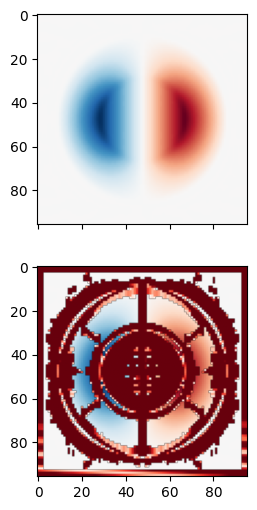

In [9]:
v = cp.asarray(sim0.snapshots[-1]["w"][idx("vx", keepdims=True)])
buffer = cp.empty((*v.shape, 12))
alpha = cp.empty((*v.shape, 1))

_ = smooth_extrema_detector(
    xp=cp,
    u=v,
    active_dims=("x", "y"),
    check_uniformity=True,
    out=alpha,
    buffer=buffer,
    uniformity_tol=1e-5,
)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

alpha_nan = cp.where(alpha == 1, cp.nan, alpha)

axs[0].imshow(cp.asnumpy(v[0, :, :, 0]), cmap="RdBu")
axs[1].imshow(cp.asnumpy(v[0, :, :, 0]), cmap="RdBu")
axs[1].imshow(cp.asnumpy(alpha_nan[0, :, :, 0, 0]), vmin=0, vmax=1, cmap="Reds_r")